## Capstone Project - News Polarity
### Name: Wong Woon Yong, Kuang Jin Mei

### Background
* Mashable is the largest independent online news site dedicated to covering digital culture, social media and technology.
* With more than 40 million unique monthly visitors, Mashable has one of the most engaged online news communities. 
* Mashable current primary competitors are BuzzFeed, Verge and TechCrunch. 
* Other than the numbers or how many articles can be shared, polarity of news also play an important role that helps people to choose the ideal articles directly based on their search. 

### Problem Statement
* Huge Number of Articles published Daily 
* Time Consuming to check Published Articles 
* Slow Response to re-act if articles are Negative

### Objective
* Factors that influence the sentiments of the Articles
* Use Machine Learning to automate the news articles polarity 
* To keep up with the fast-paced news environment 
* To push positive news out to the targeted audiences  


### Dataset 
The dataset provided by Mashable had already been processed and contains a set of features regarding news articles for a period of 2 years. The features of the dataset are further studied to understand the correlation between the datasets. 

### Data dictionary
1. n_tokens_content: Number of words in the content
2. n_unique_tokens: Rate of unique words in the content   ===> words in content 

3. num_hrefs: Number of links
4. num_imgs: Number of images
5. num_videos: Number of videos 

6. data_channel_is_entertainment: Is data channel 'Entertainment'?
7. data_channel_is_bus: Is data channel 'Business'?
8. data_channel_is_tech: Is data channel 'Tech'?
9. is_weekend: Was the article published on the weekend?   ===> data channel

10. global_subjectivity: Text subjectivity
12. title_subjectivity: Title subjectivity
11. global_sentiment_polarity: Text sentiment polarity above 0 is towards positive, below 0 is towards negative) (Target)***
13. shares: Number of shares      ===> number of publication
14. avg_positive_polarity: Avg. polarity of positive words
15. title_sentiment_polarity: Title polarity   ===> title opinions


### Import Libraries

In [1]:
## For Data wrangling 
import pandas as pd
import numpy as np

## For Visualization Plot
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
import seaborn as sns

## For Selected Model
from sklearn.naive_bayes import GaussianNB 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

### Import the CSV file.
File containing 2 years data from Mashable, and read the first 5 rows.

In [2]:
dataset = pd.read_csv('OnlineNewsPopularity.csv')
dataset.head()   

,n_tokens_content,n_unique_tokens,num_hrefs,num_imgs,num_videos,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_tech,is_weekend,global_subjectivity,global_sentiment_polarity,title_subjectivity,shares,avg_positive_polarity,title_sentiment_polarity
0,219,0.663594,4,1,0,1,0,0,0,0.521617,0.092562,0.500000,593,0.378636,-0.187500
1,255,0.604743,3,1,0,0,1,0,0,0.341246,0.148948,0.000000,711,0.286915,0.000000
2,211,0.575130,3,1,0,0,1,0,0,0.702222,0.323333,0.000000,1500,0.495833,0.000000
3,531,0.503788,9,1,0,1,0,0,0,0.429850,0.100705,0.000000,1200,0.385965,0.000000
4,1072,0.415646,19,20,0,0,0,1,0,0.513502,0.281003,0.454545,505,0.411127,0.136364


### Data Preprocessing - Check the details of dataset.
1) Run .info() function: All 15 features are numerical and no missing values.<br>
2) Run .nunique() function: Data consists 4 categorical data and 11 continuous data.

In [3]:
dataset.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0    n_tokens_content               39644 non-null  int64  
 1    n_unique_tokens                39644 non-null  float64
 2    num_hrefs                      39644 non-null  int64  
 3    num_imgs                       39644 non-null  int64  
 4    num_videos                     39644 non-null  int64  
 5    data_channel_is_entertainment  39644 non-null  int64  
 6    data_channel_is_bus            39644 non-null  int64  
 7    data_channel_is_tech           39644 non-null  int64  
 8    is_weekend                     39644 non-null  int64  
 9    global_subjectivity            39644 non-null  float64
 10   global_sentiment_polarity      39644 non-null  float64
 11   title_subjectivity             39644 non-null  float64
 12   shares                         

In [4]:
dataset.nunique()   

 n_tokens_content                  2406
 n_unique_tokens                  24878
 num_hrefs                          133
 num_imgs                            91
 num_videos                          53
 data_channel_is_entertainment        2
 data_channel_is_bus                  2
 data_channel_is_tech                 2
 is_weekend                           2
 global_subjectivity              34501
 global_sentiment_polarity        34695
 title_subjectivity                 673
 shares                            1454
 avg_positive_polarity            27301
 title_sentiment_polarity           813
dtype: int64

### Performing a basic Statistic Check on the Dataset.
Basic info of Minimum, Maximum, Standard Deviation and etc.
Noticed present of negative value in "title_sentiment_polarity" column as well.

In [5]:
dataset.describe()

,n_tokens_content,n_unique_tokens,num_hrefs,num_imgs,num_videos,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_tech,is_weekend,global_subjectivity,global_sentiment_polarity,title_subjectivity,shares,avg_positive_polarity,title_sentiment_polarity
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,546.514731,0.548216,10.883690,4.544143,1.249874,0.178009,0.157855,0.185299,0.130915,0.443370,0.119309,0.282353,3395.380184,0.353825,0.071425
std,471.107508,3.520708,11.332017,8.309434,4.107855,0.382525,0.364610,0.388545,0.337312,0.116685,0.096931,0.324247,11626.950749,0.104542,0.265450
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.393750,0.000000,1.000000,0.000000,-1.000000
25%,246.000000,0.470870,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.396167,0.057757,0.000000,946.000000,0.306244,0.000000
50%,409.000000,0.539226,8.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.453457,0.119117,0.150000,1400.000000,0.358755,0.000000
75%,716.000000,0.608696,14.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.508333,0.177832,0.500000,2800.000000,0.411428,0.150000
max,8474.000000,701.000000,304.000000,128.000000,91.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.727841,1.000000,843300.000000,1.000000,1.000000


### Data Preprocessing - Data Cleaning
Duplicate data could have repeated the information and affect the accuracy of the prediction, hence decided to remove duplicate data from Dataset; total 97 duplicate rows. (No missing values)

In [6]:
dataset2 = dataset.drop_duplicates()

In [7]:
dataset2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39547 entries, 0 to 39643
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0    n_tokens_content               39547 non-null  int64  
 1    n_unique_tokens                39547 non-null  float64
 2    num_hrefs                      39547 non-null  int64  
 3    num_imgs                       39547 non-null  int64  
 4    num_videos                     39547 non-null  int64  
 5    data_channel_is_entertainment  39547 non-null  int64  
 6    data_channel_is_bus            39547 non-null  int64  
 7    data_channel_is_tech           39547 non-null  int64  
 8    is_weekend                     39547 non-null  int64  
 9    global_subjectivity            39547 non-null  float64
 10   global_sentiment_polarity      39547 non-null  float64
 11   title_subjectivity             39547 non-null  float64
 12   shares                         

### Data Exploration - Visualization of Target
Target data of “global_sentiment_polarity” column.
It is about the "Text sentiment polarity" features, by Plotting a distribution chart to check on the data distributed over the range, from the chart below, a normal distribution (bell curve) indicating the model result could have good Quality for prediction.

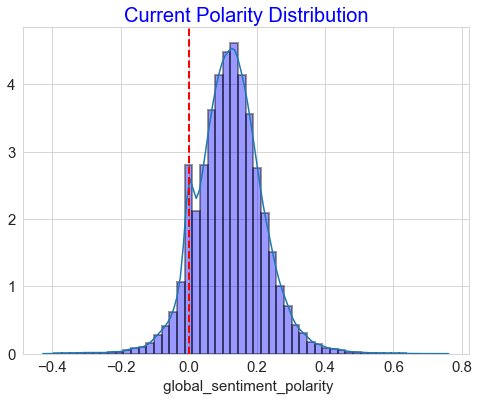

In [8]:
plt.figure(figsize=(8, 6))  
matplotlib.rcParams['font.size']= 15
sns.set_style('whitegrid')
ax1 = sns.distplot(dataset2[' global_sentiment_polarity'], bins=50,
                   hist_kws = dict(color="blue", edgecolor='black', linewidth=2))
plt.title("Current Polarity Distribution", size=20, color='b')     
plt.axvline(x=0, linewidth=2, color='red', ls='dashed');   

### Important Features Study
* the number of words count in content.
* compare to the average of posistive to the 
#### Evaluate the Target with Number of words it has in the content (n_tokens_content).   
A Scatter plot was used to further observe and evaluate the relationships between Target and number of words in the content. From the spread that is a sign of increase of positive when increasing the number of words in the content (strong positive linear). However, when having words that more then 0.2, it seen to have sign of decrease. Reason could be articles are not likely or not encourage to have too many words as audience might feel boring. <br> why choose num of content? since to evaluate Positive or Negative of polarity, the number of words in the content is the direct COUNT of positive and negative on the Target.

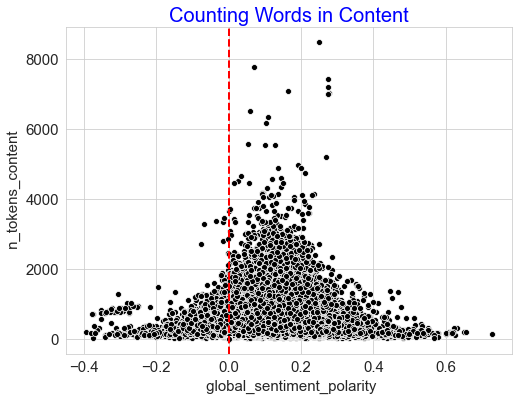

In [9]:
plt.figure(figsize=(8, 6))  
matplotlib.rcParams['font.size']= 15
sns.color_palette("Set2")
sns.set_style('whitegrid')
sns.scatterplot(x=dataset2[' global_sentiment_polarity'], y=dataset2[' n_tokens_content'],
                color='black')
plt.title("Counting Words in Content", size=20, color='blue')
plt.axvline(x=0, linewidth=2, color='red', ls='dashed');
# plt.legend()

### Comparing the Average polarity of Positive words with Target.
Since to evaluate the Positive and negative, another scatter diagram to check on the Average polarity of positive words with the target column. From the spread, there is a sign of increase in positive and average of positive in term of polarity (spread increase are likely from 0 onward).

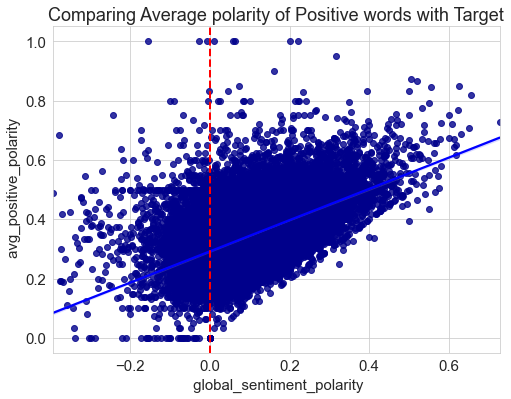

In [10]:
plt.figure(figsize=(8, 6)) 
matplotlib.rcParams['font.size']= 15
sns.set_style('whitegrid')
sns.regplot(x=dataset2[' global_sentiment_polarity'], y=dataset2[' avg_positive_polarity'], 
            data=dataset2, color='darkblue', line_kws={"color": "blue"}).set_title(
            "Comparing Average polarity of Positive words with Target")
plt.axvline(x=0, linewidth=2, color='red', ls='dashed');


### Comparing Target to shares
Is about how interesting the article is and eventually the audience will read and share with others. From the plot, it is a good sign that article with strong positive will be shared and those with most sharing article are likely to have positive polarity.

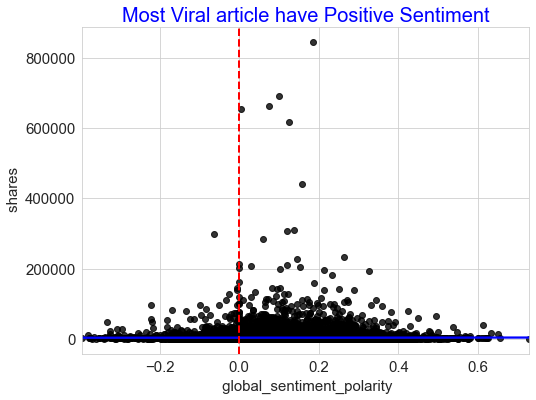

In [11]:
plt.figure(figsize=(8, 6)) 
sns.regplot(x=dataset2[' global_sentiment_polarity'],
            y=dataset2[' shares'], 
            data=dataset2, color='black', line_kws={"color": "blue"})
plt.axvline(x=0, linewidth=2, color='red', ls='dashed')
plt.title("Most Viral article have Positive Sentiment", size=20, color='b'); 


### Note: Based on the task, stakeholder is interested on articles automatically detect as positive or negative. With such, the target column will be set to "1" representing Positive and "0" representing Negative to execute the prediction.
With first segregate target to 1 and 0, first plotting a Pie-Chart to visualize with percentage and seeing that 88.97% is Positive and 11.03% is Negative. The dataset is in good sign or positive.

Positive =  35183
Negative =  4364


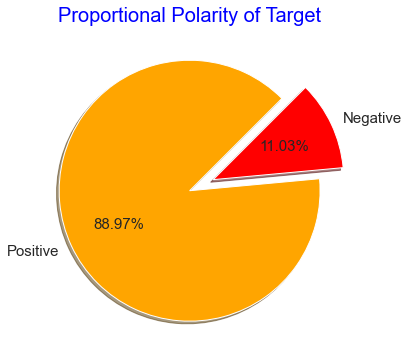

In [12]:
import matplotlib

fig, ax = plt.subplots(figsize=(8, 6))
positive = (dataset2[' global_sentiment_polarity'] > 0).sum() 
negative = (dataset2[' global_sentiment_polarity'] <= 0).sum()

matplotlib.rcParams['font.size']= 15
print('Positive = ', positive)
print('Negative = ', negative)
p = [positive, negative]

plt.pie(p,                                    # dataset
       labels = ['Positive', 'Negative'],     # labels
       colors = ['orange', 'red'],            # colors
       autopct= '%.2f%%', 
       shadow=True,
       startangle = 45,       # rotating counterclockwise from x axis
       explode = (0, 0.2))         
plt.title("Proportional Polarity of Target", size=20, color='b')
plt.show()

### Next, using Heatmap to check on the correlation for each feature with the target column.
From the result, features are not highly correlated to each other. But still able to indicate the correlate of the following features with the target. <br>

1) avg_positive_polarity    == 0.49 <br>
2) title_sentiment_polarity == 0.24 <br>
3) global_subjectivity      == 0.33 <br>
4) data_channel_is_tech     == cat  == 0.13 <br>
5) num_hrefs                == 0.084 <br>
6) data_channel_is_bus      == cat   == 0.073 <br>


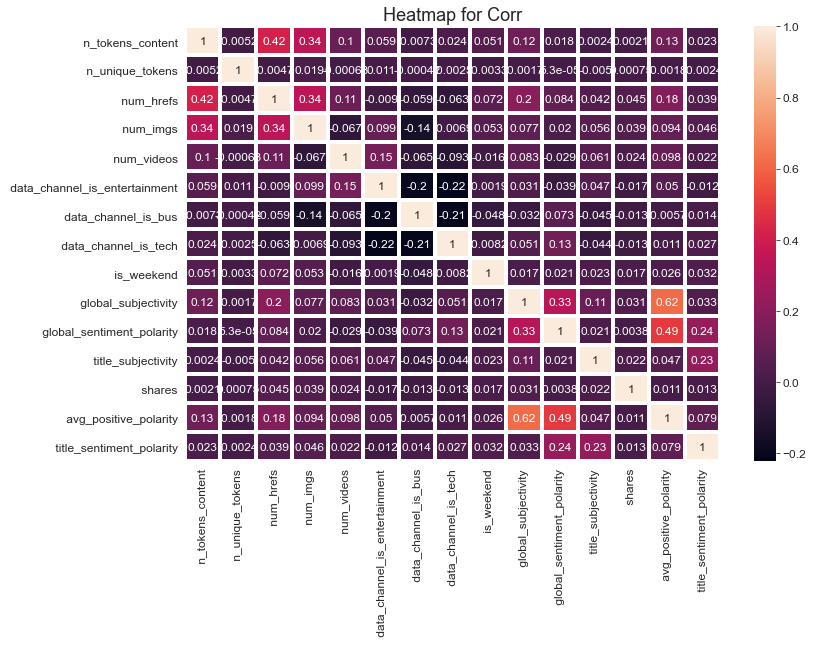

In [13]:
import matplotlib
 
matplotlib.rcParams['font.size']=12     
plt.figure(figsize=(12, 8))             

plt.title('Heatmap for Corr',  size=18)
sns.heatmap(dataset2.corr(), annot=True, cmap=None, linewidths=3, linecolor='white');

### Data Preprocessing - Handling Target Column and title sentiment polarity (consist of negative values)
Since the data is measure with positive value representing Positive polarity and negative values representing negative polarity. Apply "np.where" function to convert target and ' title_sentiment_polarity' column to 1 or 0 and check with ".head()" function. Both column converted to 1 and 0 respectively.

In [14]:
dataset2[[' global_sentiment_polarity', 
          ' title_sentiment_polarity']] = np.where(dataset2[[' global_sentiment_polarity', 
                                                             ' title_sentiment_polarity']] > 0, 1, 0)
dataset2.head()

<ipython-input-14-737076cb1953>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset2[[' global_sentiment_polarity',
C:\Users\User\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,n_tokens_content,n_unique_tokens,num_hrefs,num_imgs,num_videos,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_tech,is_weekend,global_subjectivity,global_sentiment_polarity,title_subjectivity,shares,avg_positive_polarity,title_sentiment_polarity
0,219,0.663594,4,1,0,1,0,0,0,0.521617,1,0.500000,593,0.378636,0
1,255,0.604743,3,1,0,0,1,0,0,0.341246,1,0.000000,711,0.286915,0
2,211,0.575130,3,1,0,0,1,0,0,0.702222,1,0.000000,1500,0.495833,0
3,531,0.503788,9,1,0,1,0,0,0,0.429850,1,0.000000,1200,0.385965,0
4,1072,0.415646,19,20,0,0,0,1,0,0.513502,1,0.454545,505,0.411127,1


In [15]:
dataset2.describe()     # To check the Targte from the dataset.

,n_tokens_content,n_unique_tokens,num_hrefs,num_imgs,num_videos,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_tech,is_weekend,global_subjectivity,global_sentiment_polarity,title_subjectivity,shares,avg_positive_polarity,title_sentiment_polarity
count,39547.000000,39547.000000,39547.000000,39547.000000,39547.000000,39547.000000,39547.000000,39547.000000,39547.000000,39547.000000,39547.000000,39547.000000,39547.000000,39547.000000,39547.000000
mean,547.855210,0.549560,10.910385,4.554530,1.250638,0.178421,0.158217,0.185754,0.131186,0.444458,0.889650,0.282932,3399.247275,0.354693,0.352492
std,470.905793,3.524919,11.333064,8.316334,4.112844,0.382871,0.364949,0.388913,0.337608,0.114740,0.313329,0.324276,11640.781484,0.103189,0.477752
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,247.000000,0.471420,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.396753,1.000000,0.000000,945.000000,0.306667,0.000000
50%,410.000000,0.539568,8.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.453704,1.000000,0.150000,1400.000000,0.359034,0.000000
75%,717.000000,0.608803,14.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.508446,1.000000,0.500000,2800.000000,0.411621,1.000000
max,8474.000000,701.000000,304.000000,128.000000,91.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,843300.000000,1.000000,1.000000


### Individual Feature evaluate with Target
#### Text subjectivity
The distribution of text subjectivity showing a normal distribution with high positive words. Only a small portion of outlier that indicate present of "0" in the text subjectivity.

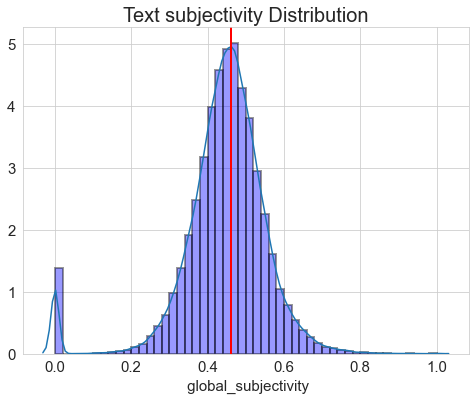

In [16]:
plt.figure(figsize=(8, 6)) 
matplotlib.rcParams['font.size']=15
sns.set_style('whitegrid')
ax = sns.distplot(dataset2[' global_subjectivity'], 
                  hist_kws = dict(color="blue", edgecolor='black', linewidth=2))
plt.title("Text subjectivity Distribution", size=20)

x1 = ax.lines[0].get_xdata()
y1 = ax.lines[0].get_ydata()
plt.axvline(x1[np.argmax(y1)], linewidth=2, color='r')

#### Title subjectivity
For title subjectivity, strong in positive polarity.

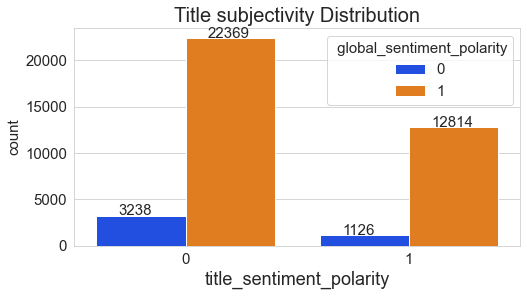

In [17]:
plt.figure(figsize=(8, 4))
matplotlib.rcParams['font.size']=15 

sns.set_style('whitegrid')
plt.title("Title subjectivity Distribution", size=20);

ax1 = sns.countplot(x=' title_sentiment_polarity', hue=' global_sentiment_polarity', 
              data=dataset2, palette='bright')
ax1.set_xlabel("title_sentiment_polarity",fontsize=18)
for p in ax1.patches:
        ax1.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

### Others Categorical data with the Target column
Lastly, understanding the categorical data. Bar chart was plot with subject to the target column and compare. All likely to be positive with regardless of is entertainment or not, business or technology related or not, or even weekdays or weekend.

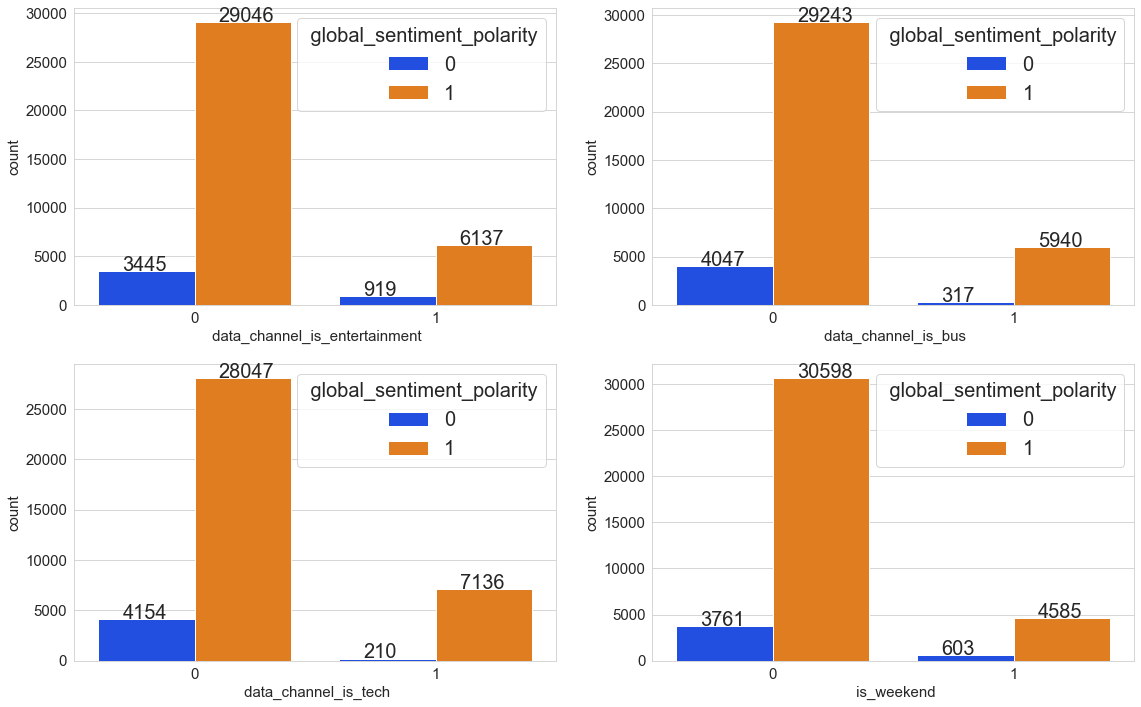

In [18]:
fig, axarr = plt.subplots(2, 2, figsize=(19, 12))
sns.set_style('whitegrid')
matplotlib.rcParams['font.size']= 20

ax1 = sns.countplot(x=' data_channel_is_entertainment', hue=' global_sentiment_polarity', 
              data=dataset2, ax=axarr[0][0], palette='bright')
for p in ax1.patches:
        ax1.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))        
ax2 = sns.countplot(x=' data_channel_is_bus', hue=' global_sentiment_polarity', 
              data=dataset2, ax=axarr[0][1], palette='bright')
for p in ax2.patches:
        ax2.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))        
ax3 = sns.countplot(x=' data_channel_is_tech', hue=' global_sentiment_polarity', 
              data=dataset2, ax=axarr[1][0], palette='bright')
for p in ax3.patches:
        ax3.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))       
ax4 = sns.countplot(x=' is_weekend', hue=' global_sentiment_polarity', 
              data=dataset2, ax=axarr[1][1], palette='bright')
for p in ax4.patches:
        ax4.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))
plt.show()

# sns.set(font_scale=1)

### Features Engineering - Preforming Encoding and Plan for Modelling.
Apply One-Hot-Encoding on dataset and check for Multicolinearity issues, since the data is low in correlate on each feature, hence the simple model of Logistic Regression can be used for prediction.

In [19]:
dataset3 = pd.get_dummies(dataset2, drop_first = True)   # One-Hot-Encoding

In [20]:
dataset3.head()

,n_tokens_content,n_unique_tokens,num_hrefs,num_imgs,num_videos,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_tech,is_weekend,global_subjectivity,global_sentiment_polarity,title_subjectivity,shares,avg_positive_polarity,title_sentiment_polarity
0,219,0.663594,4,1,0,1,0,0,0,0.521617,1,0.500000,593,0.378636,0
1,255,0.604743,3,1,0,0,1,0,0,0.341246,1,0.000000,711,0.286915,0
2,211,0.575130,3,1,0,0,1,0,0,0.702222,1,0.000000,1500,0.495833,0
3,531,0.503788,9,1,0,1,0,0,0,0.429850,1,0.000000,1200,0.385965,0
4,1072,0.415646,19,20,0,0,0,1,0,0.513502,1,0.454545,505,0.411127,1


In [21]:
multicolinearity_check = dataset3.corr()
multicolinearity_check

,n_tokens_content,n_unique_tokens,num_hrefs,num_imgs,num_videos,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_tech,is_weekend,global_subjectivity,global_sentiment_polarity,title_subjectivity,shares,avg_positive_polarity,title_sentiment_polarity
n_tokens_content,1.000000,-0.005188,0.421505,0.341850,0.103655,0.059069,-0.007271,0.024098,0.051196,0.119394,0.164812,0.002420,0.002077,0.127504,0.008768
n_unique_tokens,-0.005188,1.000000,-0.004724,0.018615,-0.000627,0.010853,-0.000419,-0.002511,-0.003312,-0.001661,-0.004291,-0.004961,0.000755,-0.001806,-0.004689
num_hrefs,0.421505,-0.004724,1.000000,0.341955,0.114470,-0.009014,-0.059398,-0.062946,0.071615,0.198276,0.107707,0.042331,0.045137,0.183057,0.020602
num_imgs,0.341850,0.018615,0.341955,1.000000,-0.067439,0.098852,-0.143144,-0.006892,0.052878,0.077126,0.005599,0.056004,0.039238,0.093575,0.037257
num_videos,0.103655,-0.000627,0.114470,-0.067439,1.000000,0.146782,-0.064747,-0.093307,-0.016123,0.082825,-0.033068,0.060957,0.023910,0.098201,0.025418
data_channel_is_entertainment,0.059069,0.010853,-0.009014,0.098852,0.146782,1.000000,-0.202034,-0.222581,-0.001887,0.030904,-0.029589,0.047294,-0.017156,0.050364,0.019052
data_channel_is_bus,-0.007271,-0.000419,-0.059398,-0.143144,-0.064747,-0.202034,1.000000,-0.207070,-0.048195,-0.032438,0.082586,-0.045222,-0.012516,-0.005679,0.008768
data_channel_is_tech,0.024098,-0.002511,-0.062946,-0.006892,-0.093307,-0.222581,-0.207070,1.000000,-0.008222,0.051402,0.124638,-0.043944,-0.013416,0.010960,-0.004819
is_weekend,0.051196,-0.003312,0.071615,0.052878,-0.016123,-0.001887,-0.048195,-0.008222,1.000000,0.017407,-0.007292,0.023428,0.016858,0.025574,0.033593
global_subjectivity,0.119394,-0.001661,0.198276,0.077126,0.082825,0.030904,-0.032438,0.051402,0.017407,1.000000,0.339289,0.109417,0.030893,0.619894,0.029480


### Visualize the Multicolinearity issues with a Heatmap.

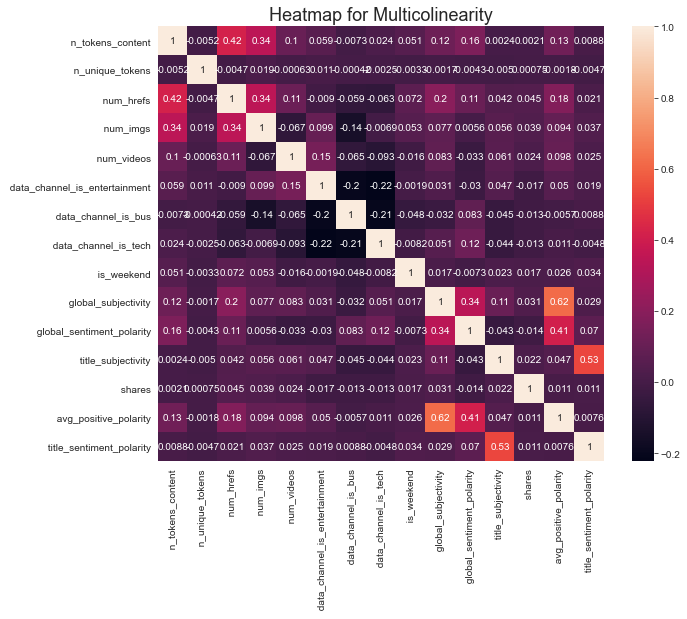

In [22]:
matplotlib.rcParams['font.size']=10
figure = plt.figure(figsize=(10,8))
plt.title('Heatmap for Multicolinearity',  size=18)
sns.heatmap(multicolinearity_check, annot=True);

### Splitting the data to Features and Target set for prediction
With completion of cleaning the dataset, next proceed to split the data to Features and Target. Drop the target column from the features and assigning the target variable of "global sentiment polarity".

In [23]:
features = dataset3.drop([' global_sentiment_polarity'], axis=1)     # assigning features and check.
features.head()

,n_tokens_content,n_unique_tokens,num_hrefs,num_imgs,num_videos,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_tech,is_weekend,global_subjectivity,title_subjectivity,shares,avg_positive_polarity,title_sentiment_polarity
0,219,0.663594,4,1,0,1,0,0,0,0.521617,0.500000,593,0.378636,0
1,255,0.604743,3,1,0,0,1,0,0,0.341246,0.000000,711,0.286915,0
2,211,0.575130,3,1,0,0,1,0,0,0.702222,0.000000,1500,0.495833,0
3,531,0.503788,9,1,0,1,0,0,0,0.429850,0.000000,1200,0.385965,0
4,1072,0.415646,19,20,0,0,0,1,0,0.513502,0.454545,505,0.411127,1


In [24]:
target = dataset3[' global_sentiment_polarity']      # assigning target and check
target.head()

0    1
1    1
2    1
3    1
4    1
Name:  global_sentiment_polarity, dtype: int64

### Perform Train-Test-Split and Standard Scaler
Based on ratio of the dataset, we will set the test size to 20% and perform Standard Scaler on the Train-set and Test-set. With such, completion on the Data Preprocessing on the given dataset.

In [25]:
from sklearn.model_selection import train_test_split       # train-test-split

X_train, X_test, y_train, y_test = train_test_split(features, target, 
                                                    test_size = 0.2, random_state = 111)

In [26]:
from sklearn.preprocessing import StandardScaler     

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)                                  

### Machine Learning Model training:
### 1) Logistic Regression
Since objective in predicting the Positive or Negative and with Target converted into 1 and 0, hence choosing Logistic Regression model as it main in explaining data and relationship between all the features and binary target (1 and 0).<br>
* By fitting Logistic Regression with Train-set and perform prediction, this is to get an overview of "Overfitting and Underfitting" issues of a model before testing with final test-set, and this helps to give an insight on how well it's doing on the training dataset.

### Import Logistic Regression model and fit with Train-set.

In [27]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

### Perform prediction on the "Train-set".

In [28]:
train_y_pred = classifier.predict(X_train)    
train_y_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [29]:
train_y_pred.shape 

(31637,)

### Model Evaluation 
Result will be evaluating with, <br> 
1) Confusion Matrix: to understand the sample classification issues, or correctly predicted and mis-classification. <br>
2) Classification report: to check on the Precision and Recall for positive prediction. <br>
3) AUC-Score: used for final justification purpose since the dataset is imbalanced.

[[ 1097  2381]
 [  153 28006]]


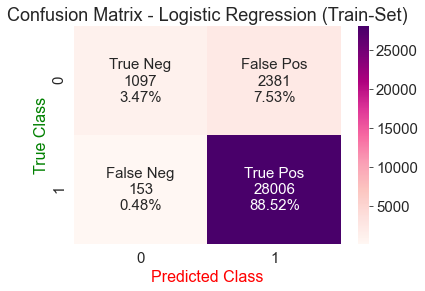

In [30]:
from sklearn.metrics import confusion_matrix, classification_report
figure = plt.figure(figsize=(6,4))
matplotlib.rcParams['font.size']=15

cm= confusion_matrix(y_train, train_y_pred)      # Computing the Confusion Matirx.
print(cm)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='RdPu')

plt.xlabel('Predicted Class', fontsize=16, color='r') 
plt.ylabel('True Class', fontsize=16, color='g')
plt.title('Confusion Matrix - Logistic Regression (Train-Set)', size=18);


In [31]:
print(classification_report(y_train, train_y_pred))    # Generate Classification Report.

              precision    recall  f1-score   support

           0       0.88      0.32      0.46      3478
           1       0.92      0.99      0.96     28159

    accuracy                           0.92     31637
   macro avg       0.90      0.65      0.71     31637
weighted avg       0.92      0.92      0.90     31637



In [32]:
from sklearn.metrics import roc_auc_score              # Compute the AUC-Score for the "Train-set".
LR_area_under_curve = roc_auc_score(y_train, train_y_pred)
print(LR_area_under_curve)

0.6549888621258797


### Observation on Train-set above:
From the Train-set result, high accuracy but moderate on AUC-score (could have overfitting with this model).

### Proceed on predicting the Test-set with Logistic Regression Model.
In order to build a baseline prediction result to compare with other models, continue perform the prediction with Logistic Regression.

In [33]:
y_pred = classifier.predict(X_test)    
y_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [34]:
y_pred.shape   # 20%

(7910,)

### Model Evaluation - Logistic Regression Test-set result: 
1) Confusion Matrix: Correctly predicted 6987 True Positive or 88.33% of dataset. <br>
2) Classification Report: High score on Precision, Recall and Accuracy, model good in predicting positive class. Less accurate in predicting negative class as Recall is 0.34. <br>
3) AUC-score: Above Moderate, 66.5%. <br>
Generating same set of evaluation matrix to compare.

[[ 297  589]
 [  37 6987]]


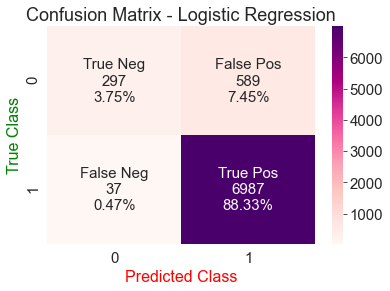

In [35]:
from sklearn.metrics import confusion_matrix, classification_report
figure = plt.figure(figsize=(6,4))
matplotlib.rcParams['font.size']=15

cm= confusion_matrix(y_test, y_pred)  
print(cm)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='RdPu')

plt.xlabel('Predicted Class', fontsize=16, color='r') 
plt.ylabel('True Class', fontsize=16, color='g')
plt.title('Confusion Matrix - Logistic Regression', size=18);


In [36]:
print(classification_report(y_test, y_pred))          # Generate Classification Report.

              precision    recall  f1-score   support

           0       0.89      0.34      0.49       886
           1       0.92      0.99      0.96      7024

    accuracy                           0.92      7910
   macro avg       0.91      0.66      0.72      7910
weighted avg       0.92      0.92      0.90      7910



In [37]:
from sklearn.metrics import roc_auc_score            # Compute AUC-Score for the "Test-set".
LR_area_under_curve = roc_auc_score(y_test, y_pred)
print(LR_area_under_curve)

LR_AUC_Score = round(LR_area_under_curve*100, 0)     # for generating overall result in Bar Chart.
LR_AUC_Score

0.6649733965970269


66.0

In [38]:
classifier.predict_proba(X_test).shape      # Pre-check on the test-set shape.

(7910, 2)

### Visualize Logistic Regression AUC-score with ROC plot
From the AUC-score, result of Logistic Regression is 0.66 or 66% (above moderate). <br>
Note: Perfect result for AUC-score is 1 or 100%.

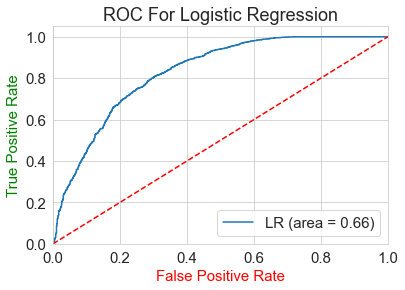

In [39]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, classifier.predict_proba(X_test)[:,1])  

matplotlib.rcParams['font.size']=15
figure = plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label='LR (area = %0.2f)' % LR_area_under_curve)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate', color='red')
plt.ylabel('True Positive Rate', color='green')
plt.title('ROC For Logistic Regression')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()

### Add-On check with Naïve Bayes Model
Preform the prediction with Naïve Bayes model to compare.

In [40]:
# Training the model
NB = GaussianNB()
NB.fit(X_train, y_train)

# Testing the model 
NBy_pred = NB.predict(X_test)

In [41]:
NBy_pred.shape

(7910,)

### Observation on Naïve Bayes model:
High accuracy but moderate on AUC-score too.

[[ 272  614]
 [  67 6957]]


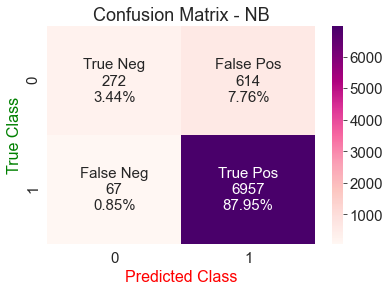

In [42]:
from sklearn.metrics import confusion_matrix, classification_report
figure = plt.figure(figsize=(6,4))
matplotlib.rcParams['font.size']=15

cm= confusion_matrix(y_test, NBy_pred)
print(cm)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='RdPu')

plt.xlabel('Predicted Class', fontsize=16, color='r') 
plt.ylabel('True Class', fontsize=16, color='g')
plt.title('Confusion Matrix - NB', size=18);


In [43]:
print(classification_report(y_test, NBy_pred))          # Generate Classification Report.

              precision    recall  f1-score   support

           0       0.80      0.31      0.44       886
           1       0.92      0.99      0.95      7024

    accuracy                           0.91      7910
   macro avg       0.86      0.65      0.70      7910
weighted avg       0.91      0.91      0.90      7910



In [44]:
from sklearn.metrics import roc_auc_score               # Compute AUC-Score for Naive Bayes.
NB_area_under_curve = roc_auc_score(y_test, NBy_pred)
print(NB_area_under_curve)

0.6487295091450402


### 2) Random Forest

It is a flexible and easy to use machine learning algorithm that mostly can produces a great result. With its capability in handling large data sets coupled with handling both classification and regression tasks, that make Random Forest as one of the most used algorithms. Basic technique of Random Forest is combination of many Decision Trees model with the final predictions that made by averaging of each individual tree; and reason for choosing is unlike Logistics Regression, it is better at fitting non-linear data and even features with correlation.

* Start fitting the Random Forest Classification model with Training-set. As the dataset is having 39547 rows, we will start setting the n_estimator to 100 (trees) and criterion as entropy for information gain and maximize the mutual information.

### Import Random Forest model and fit with Train-set.

In [45]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 111) 
RF.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=111)

In [46]:
RF_y_pred_train = RF.predict(X_train)

[[ 3477     1]
 [    0 28159]]


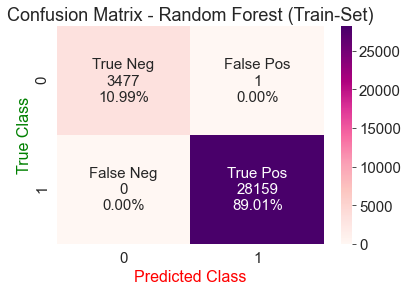

In [47]:
from sklearn.metrics import confusion_matrix, classification_report
figure = plt.figure(figsize=(6,4))
matplotlib.rcParams['font.size']=15

cm = confusion_matrix(y_train, RF_y_pred_train)
print(cm)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='RdPu')

plt.xlabel('Predicted Class', fontsize=16, color='r') 
plt.ylabel('True Class', fontsize=16, color='g')
plt.title('Confusion Matrix - Random Forest (Train-Set)', size=18);


In [48]:
print(classification_report(y_train, RF_y_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3478
           1       1.00      1.00      1.00     28159

    accuracy                           1.00     31637
   macro avg       1.00      1.00      1.00     31637
weighted avg       1.00      1.00      1.00     31637



In [49]:
from sklearn.metrics import roc_auc_score  
RF_area_under_curve = roc_auc_score(y_train, RF_y_pred_train)
print(RF_area_under_curve)

0.9998562392179414


### Result above shown overfitting on train-set.
Decided to proceed on prediction for test-set, and perform parameter tuning and Features Importance to find the best features. 

### Proceed on predicting the Test-set with Random Forest Model.

In [50]:
RF_y_pred = RF.predict(X_test)            # Predicting the Test-set

### Model Evaluation - Random Forest Test-set result: 
1) Confusion Matrix: Correctly predicted 6980 True positive or 88.24% of dataset. <br>
2) Classification Report: High score on Precision, Recall and Accuracy, model good in predicting positive class. Less accurate in predicting negative class as Recall is 0.36. <br>
3) AUC-score: Above Moderate, 67.75%. <br>

[[ 320  566]
 [  44 6980]]


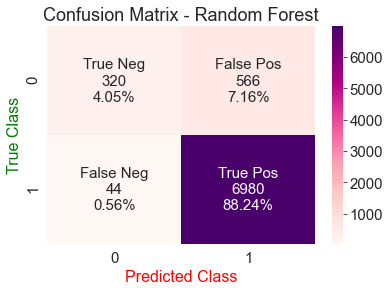

In [51]:
from sklearn.metrics import confusion_matrix, classification_report
figure = plt.figure(figsize=(6,4))
matplotlib.rcParams['font.size']=15

cm = confusion_matrix(y_test, RF_y_pred)
print(cm)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='RdPu')

plt.xlabel('Predicted Class', fontsize=16, color='r') 
plt.ylabel('True Class', fontsize=16, color='g')
plt.title('Confusion Matrix - Random Forest', size=18);


In [52]:
print(classification_report(y_test, RF_y_pred))         # Generate Classification Report.

              precision    recall  f1-score   support

           0       0.88      0.36      0.51       886
           1       0.92      0.99      0.96      7024

    accuracy                           0.92      7910
   macro avg       0.90      0.68      0.74      7910
weighted avg       0.92      0.92      0.91      7910



In [53]:
# Random Forest: AUC score test-set result

from sklearn.metrics import roc_auc_score            # Compute AUC-Score for the "Test-set".
RF_area_under_curve = roc_auc_score(y_test, RF.predict(X_test)) 
print(RF_area_under_curve)

RF_AUC_Score = round(RF_area_under_curve*100, 0)     # for generating overall result in Bar Chart.
RF_AUC_Score
                           

0.6774547889981848


68.0

In [54]:
RF.predict_proba(X_test).shape

(7910, 2)

### Visualize Random Forest AUC-score with ROC plot
From the AUC-score, result of Random Forest is 0.68 or 68% (above moderate). <br>
Performance is slightly better than Logistic Regression model.

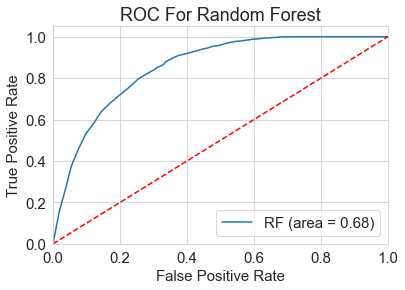

In [55]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, RF.predict_proba(X_test)[:,1])  

matplotlib.rcParams['font.size']=15
figure = plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label='RF (area = %0.2f)' % RF_area_under_curve)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC For Random Forest')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()

## Handling Class imbalance
Since the dataset is imbalanced, we will apply the SMOTE technique (Synthetic Minority Oversampling Technique) to handle this issue. With the random of parameter stated in the dictionary, allow model to choose the best set of parameters and perform prediction with the best parameter set again.
This will help to further enhance the prediction result with Random Forest.

In [56]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV        
base_rf = RandomForestClassifier(random_state = 888)    # import the base of Random Forest model.

### Provide optional parameter set in dictionary for selection
Given the option of "3 max_depth" and "2 n_estimator" is having consideration of model processing time, the more the option it has, the longer the processing time it took.

In [57]:
param_dict1 = {'max_depth' : [3, 7, 10] ,            #3,7,10 / 5,6,7,9,10
               'criterion': ['gini','entropy'],
               'n_estimators': [100, 200] }          #100, 200 / 10/50/100

In [58]:
param_dict1

{'max_depth': [3, 7, 10],
 'criterion': ['gini', 'entropy'],
 'n_estimators': [100, 200]}

### Performing the process and fit with Train-set.

In [59]:
grid_model = GridSearchCV(estimator= base_rf, param_grid = param_dict1 , cv=5 , verbose= 2) 

In [60]:
grid_model.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] criterion=gini, max_depth=3, n_estimators=100 ...................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .... criterion=gini, max_depth=3, n_estimators=100, total=   0.8s
[CV] criterion=gini, max_depth=3, n_estimators=100 ...................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


[CV] .... criterion=gini, max_depth=3, n_estimators=100, total=   0.8s
[CV] criterion=gini, max_depth=3, n_estimators=100 ...................
[CV] .... criterion=gini, max_depth=3, n_estimators=100, total=   0.8s
[CV] criterion=gini, max_depth=3, n_estimators=100 ...................
[CV] .... criterion=gini, max_depth=3, n_estimators=100, total=   0.7s
[CV] criterion=gini, max_depth=3, n_estimators=100 ...................
[CV] .... criterion=gini, max_depth=3, n_estimators=100, total=   0.7s
[CV] criterion=gini, max_depth=3, n_estimators=200 ...................
[CV] .... criterion=gini, max_depth=3, n_estimators=200, total=   1.6s
[CV] criterion=gini, max_depth=3, n_estimators=200 ...................
[CV] .... criterion=gini, max_depth=3, n_estimators=200, total=   1.6s
[CV] criterion=gini, max_depth=3, n_estimators=200 ...................
[CV] .... criterion=gini, max_depth=3, n_estimators=200, total=   1.7s
[CV] criterion=gini, max_depth=3, n_estimators=200 ...................
[CV] .

[CV]  criterion=entropy, max_depth=10, n_estimators=200, total=   4.8s


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:  2.5min finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=888),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 7, 10], 'n_estimators': [100, 200]},
             verbose=2)

In [61]:
grid_model.best_params_     

{'criterion': 'gini', 'max_depth': 10, 'n_estimators': 200}

### Building the Random Forest model based on best parameter from Grid Search
From the Grid Search result with the best parameter, fit the setting to Create Best Random Forest parameters and predict again.

In [62]:
best_RF = RandomForestClassifier(max_depth = 10, n_estimators = 200, random_state = 888)
best_RF

RandomForestClassifier(max_depth=10, n_estimators=200, random_state=888)

In [63]:
model_rf = best_RF.fit(X_train, y_train)
result_rf = model_rf.predict(X_test)

### Model Evaluation - Random Forest result with Best Parameter: 
1) Confusion Matrix: Correctly predicted 7003 True Positive or 88% from the dataset. <br>
2) Classification Report: High score on Precision, Recall and Accuracy, model good in predicting positive class. Less accurate in predicting negative class as Recall is 0.34. <br>
3) AUC-score: Above Moderate, 66.78%. Slightly lower compare to Random Forest Base model. <br>

[[ 300  586]
 [  21 7003]]


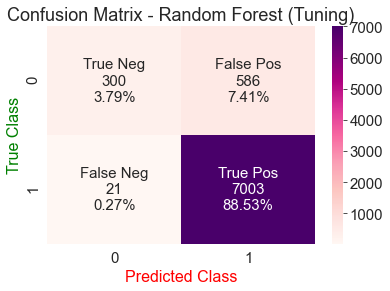

In [64]:
from sklearn.metrics import confusion_matrix, classification_report
figure = plt.figure(figsize=(6,4))
matplotlib.rcParams['font.size']=15

cm = confusion_matrix(y_test, result_rf)
print(cm)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='RdPu')

plt.xlabel('Predicted Class', fontsize=16, color='r') 
plt.ylabel('True Class', fontsize=16, color='g')
plt.title('Confusion Matrix - Random Forest (Tuning)', size=18);


In [65]:
print(classification_report(y_test , result_rf))       # Generate Classification Report.

              precision    recall  f1-score   support

           0       0.93      0.34      0.50       886
           1       0.92      1.00      0.96      7024

    accuracy                           0.92      7910
   macro avg       0.93      0.67      0.73      7910
weighted avg       0.92      0.92      0.91      7910



In [66]:
# AUC-score for best Random Forest
roc_auc_score(y_test, result_rf)


0.6678053510183724

## Feature Importance with Random Forest
With the Moderate result after applying SMOTE technique, next to perform "Features Importance" to identify which features contributes or decreasing the weighted impurity. Apply to Random Forest is to averaging the decrease in impurity among the trees.

In [67]:
len(model_rf.feature_importances_)           # check for the features

14

In [68]:
model_rf.feature_importances_ 

array([0.13959178, 0.12469606, 0.09810926, 0.02064582, 0.02858439,
       0.00251852, 0.00789188, 0.01989921, 0.00230745, 0.17230238,
       0.02642227, 0.022622  , 0.31404066, 0.02036831])

In [69]:
columns = features.columns 
columns

Index([' n_tokens_content', ' n_unique_tokens', ' num_hrefs', ' num_imgs',
       ' num_videos', ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_tech', ' is_weekend', ' global_subjectivity',
       ' title_subjectivity', ' shares', ' avg_positive_polarity',
       ' title_sentiment_polarity'],
      dtype='object')

[0.13959178 0.12469606 0.09810926 0.02064582 0.02858439 0.00251852
 0.00789188 0.01989921 0.00230745 0.17230238 0.02642227 0.022622
 0.31404066 0.02036831]


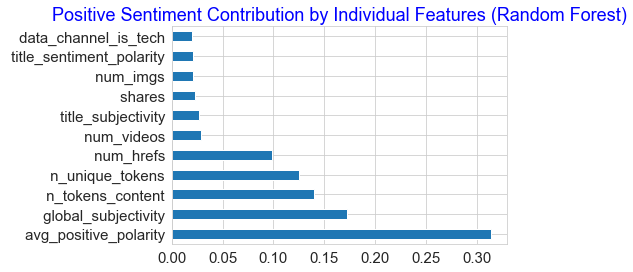

In [70]:
feat_importances = pd.Series(model_rf.feature_importances_, index=columns)  # to include title....
print(model_rf.feature_importances_)
feat_importances.nlargest(11).plot(kind='barh')
plt.title('Positive Sentiment Contribution by Individual Features (Random Forest)', 
          size=18, color='blue');

### Perform Random Forest Prediction with Importance Features (High score)
From the Feature Importance result, select only the 5 features with high score for prediction. Assigning the Features2 and Target2 accordingly.

In [71]:
features2 = dataset3[[' avg_positive_polarity',' global_subjectivity',' n_tokens_content',
                      ' n_unique_tokens', ' num_hrefs']]   
features2.head()

,avg_positive_polarity,global_subjectivity,n_tokens_content,n_unique_tokens,num_hrefs
0,0.378636,0.521617,219,0.663594,4
1,0.286915,0.341246,255,0.604743,3
2,0.495833,0.702222,211,0.575130,3
3,0.385965,0.429850,531,0.503788,9
4,0.411127,0.513502,1072,0.415646,19


In [72]:
target2 = dataset3[' global_sentiment_polarity'].values 
target2

array([1, 1, 1, ..., 1, 0, 1], dtype=int64)

### Perform Train-Test-Split and Fitting the Model
Perform train-test-split on the Features2 and Target2, create "Important Random Forest" with assigning the best parameter.

In [73]:
from sklearn.model_selection import train_test_split    
X_train2, X_test2, y_train2, y_test2 = train_test_split(features2, target2, 
                                                    test_size = 0.2, random_state = 111)

In [74]:
Im_RF = RandomForestClassifier(max_depth = 10, n_estimators = 200, random_state = 888)
Im_RF

RandomForestClassifier(max_depth=10, n_estimators=200, random_state=888)

### Proceed prediction with "Important Random Forest".

In [75]:
Im_model_rf = Im_RF.fit(X_train2, y_train2)
Im_result_rf = Im_model_rf.predict(X_test2)

### Model Evaluation - Random Forest result with Features Importance: 
1) Confusion Matrix: Correctly predicted 7006 True Positive or 88.57% from the dataset. <br>
2) Classification Report: High score on Precision, Recall and Accuracy, model good in predicting positive class. Less accurate in predicting negative class as Recall is 0.34. <br>
3) AUC-score: Above Moderate, 66.74%. Slightly lower compare to Random Forest Base model. <br>

[[ 299  587]
 [  18 7006]]


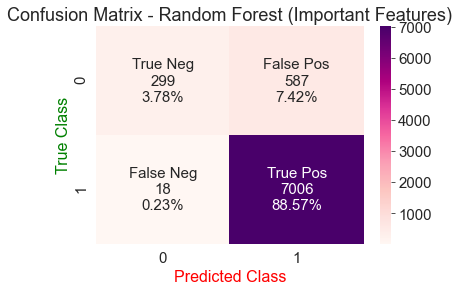

In [76]:
from sklearn.metrics import confusion_matrix, classification_report
figure = plt.figure(figsize=(6,4))
matplotlib.rcParams['font.size']=15

cm = confusion_matrix(y_test2, Im_result_rf)
print(cm)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='RdPu')

plt.xlabel('Predicted Class', fontsize=16, color='r') 
plt.ylabel('True Class', fontsize=16, color='g')
plt.title('Confusion Matrix - Random Forest (Important Features)', size=18);


In [77]:
print(classification_report(y_test2, Im_result_rf))     # Generate Classification Report.

              precision    recall  f1-score   support

           0       0.94      0.34      0.50       886
           1       0.92      1.00      0.96      7024

    accuracy                           0.92      7910
   macro avg       0.93      0.67      0.73      7910
weighted avg       0.92      0.92      0.91      7910



In [78]:
# AUC-score for Importnat Random Forest
roc_auc_score(y_test2, Im_result_rf)


0.6674545704633452

### 3) XGBoost Model
An ensemble machine learning technique that enhances with Gradient boosting framework, and is well known because of its fast execution and Scalability. A perfect combination of software and hardware optimization techniques to yield superior results using fewer computing resources in the shortest amount of time. In short, Execution Speed and Model Performance are the two main reasons and goals for using XGBoost model.

### Call the Features and Target and perform Train-Test-Split

In [79]:
features.head()

,n_tokens_content,n_unique_tokens,num_hrefs,num_imgs,num_videos,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_tech,is_weekend,global_subjectivity,title_subjectivity,shares,avg_positive_polarity,title_sentiment_polarity
0,219,0.663594,4,1,0,1,0,0,0,0.521617,0.500000,593,0.378636,0
1,255,0.604743,3,1,0,0,1,0,0,0.341246,0.000000,711,0.286915,0
2,211,0.575130,3,1,0,0,1,0,0,0.702222,0.000000,1500,0.495833,0
3,531,0.503788,9,1,0,1,0,0,0,0.429850,0.000000,1200,0.385965,0
4,1072,0.415646,19,20,0,0,0,1,0,0.513502,0.454545,505,0.411127,1


In [80]:
target.head()

0    1
1    1
2    1
3    1
4    1
Name:  global_sentiment_polarity, dtype: int64

In [81]:
from sklearn.model_selection import train_test_split       # train-test-split

X_train, X_test, y_train, y_test = train_test_split(features, target, 
                                                    test_size = 0.2, random_state = 111)

### Import XGBoost model and fit with Train-set.

In [82]:
import xgboost as xgb1                      
xgb1 = xgb1.XGBClassifier(random_state = 1)
xgb_model = xgb1.fit(X_train, y_train)

### Perform prediction on the Train-set.

In [83]:
xgb_result_train = xgb_model.predict(X_train)
xgb_result_train = np.array(np.around(xgb_result_train), dtype = int)

### Model Evaluation - XGBoost Model (Train-set) result: 
1) Confusion Matrix: Correctly predicted 28104 True Positive or 88.83% from the train dataset. <br>
2) Classification Report: Prediction for both classes is good, high score on class 1 Precision, Recall and Accuracy, Negative prediction with 0.55 on Recall. <br>
3) AUC-score: Good at 77.65%. <br>

[[ 1930  1548]
 [   55 28104]]


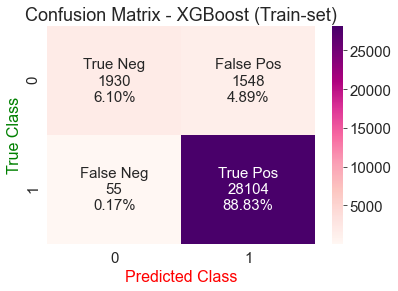

In [84]:
from sklearn.metrics import confusion_matrix, classification_report
figure = plt.figure(figsize=(6,4))
matplotlib.rcParams['font.size']=15

cm = confusion_matrix(y_train, xgb_result_train)
print(cm)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='RdPu')

plt.xlabel('Predicted Class', fontsize=16, color='r') 
plt.ylabel('True Class', fontsize=16, color='g')
plt.title('Confusion Matrix - XGBoost (Train-set)', size=18);


In [85]:
print(classification_report(y_train, xgb_result_train))

              precision    recall  f1-score   support

           0       0.97      0.55      0.71      3478
           1       0.95      1.00      0.97     28159

    accuracy                           0.95     31637
   macro avg       0.96      0.78      0.84     31637
weighted avg       0.95      0.95      0.94     31637



In [86]:
# AUC-score for XGBoost Train-set
roc_auc_score(y_train, xgb_result_train)


0.7764817121929054

### Proceed on predicting the Test-set with XGBoost Model.

In [87]:
xgb_result = xgb_model.predict(X_test)
xgb_result = np.array(np.around(xgb_result), dtype = int)

### Model Evaluation - XGBoost model (Test-set) result: 
1) Confusion Matrix: Correctly predicted 6936 True Positive or 87.69% from the dataset. <br>
2) Classification Report: High score on Precision, Recall and Accuracy, model good in predicting positive class. Less accurate in predicting negative class as Recall is 0.40. But best result compares to others two model. <br>
3) AUC-score: Good, 69.58% or 70%. Best AUC-score compare to previous models. <br>

[[ 358  528]
 [  88 6936]]


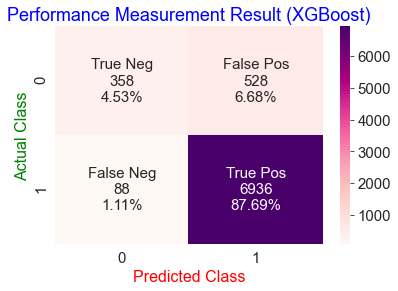

In [88]:
from sklearn.metrics import confusion_matrix, classification_report
figure = plt.figure(figsize=(6,4))
matplotlib.rcParams['font.size']=15

cm = confusion_matrix(y_test, xgb_result)
print(cm)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='RdPu')

plt.xlabel('Predicted Class', fontsize=16, color='r') 
plt.ylabel('Actual Class', fontsize=16, color='g')
plt.title('Performance Measurement Result (XGBoost)', size=18,color='b');


In [89]:
print(classification_report(y_test, xgb_result))

              precision    recall  f1-score   support

           0       0.80      0.40      0.54       886
           1       0.93      0.99      0.96      7024

    accuracy                           0.92      7910
   macro avg       0.87      0.70      0.75      7910
weighted avg       0.92      0.92      0.91      7910



In [90]:
XGB_area_under_curve = roc_auc_score(y_test, xgb_result)   # Compute AUC-Score for the "Test-set".
print(XGB_area_under_curve)

XGBoost_AUC_Score = round(XGB_area_under_curve*100, 0)  # for generating overall result in Bar Chart.
XGBoost_AUC_Score


0.6957673658067535


70.0

In [91]:
xgb1.predict_proba(X_test).shape

(7910, 2)

### Visualize XGBoost AUC-score with ROC plot
From the AUC-score, result of Random Forest is 0.7 or 70% (Good). <br>

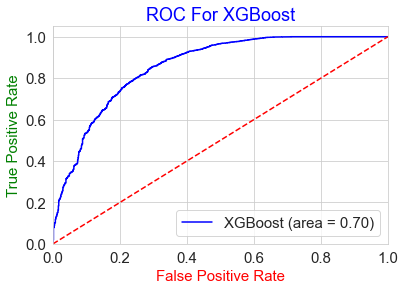

In [92]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, xgb1.predict_proba(X_test)[:,1])  

matplotlib.rcParams['font.size']=15
figure = plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label='XGBoost (area = %0.2f)' % XGB_area_under_curve, color='b')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate', color='red')
plt.ylabel('True Positive Rate', color='green')
plt.title('ROC For XGBoost', color='b')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()

## Parameter Tuning for XGBoost Model
To enhance the performance of XGBoost, we will perform Parameter Tuning to have the best parameter for the model to perform training. 

In [93]:
import xgboost as xgb                      
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

xgb = xgb.XGBClassifier(random_state = 1)   

xgBoost_model = xgb.fit(X_train, y_train)
xgBoost_result = xgBoost_model.predict(X_test)

In [94]:
target.value_counts() 

1    35183
0     4364
Name:  global_sentiment_polarity, dtype: int64

In [95]:
x = 35183/4364

### Provide optional parameter set in dictionary for selection
Given the option for "max_depth", "learning_rate" and "reg_lambda" (lambda) to perform the tuning. Learning rate is about how fast the error is corrected during the model execution.

In [96]:
param_grid = {
    'max_depth': [5, 6, 7],
    'learning_rate': [0.1, 0.5, 1],
    'reg_lambda': [10.0, 20, 100],
     'scale_pos_weight': [x]
}

In [97]:
optimal_params = GridSearchCV(
                    estimator = xgb,  
                    param_grid = param_grid,
                    scoring = 'recall', 
                    verbose = 0, 
                    cv = 3
)

optimal_params.fit(X_train, 
                   y_train, 
                   early_stopping_rounds=10,   
                   eval_set=[(X_test, y_test)],   # evaluate auc upon the test set
                   verbose=False)

print(optimal_params.best_params_)

{'learning_rate': 0.1, 'max_depth': 5, 'reg_lambda': 10.0, 'scale_pos_weight': 8.062098991750688}


### Perform prediction with XGBoost based on best parameter.
Perfom prediction with the test-set again.

In [98]:
xgBoost_result2 = optimal_params.predict(X_test)

### Model Evaluation - XGBoost model with Best Parameter result: 
1) Confusion Matrix: Correctly predicted 7020 True Positive or 88.75% from the dataset. <br>
2) Classification Report: High score on Precision, Recall and Accuracy, model good in predicting positive class. Less accurate in predicting negative class as Recall is 0.29. <br>
3) AUC-score: Moderate, 64.31%. <br>

[[ 254  632]
 [   4 7020]]


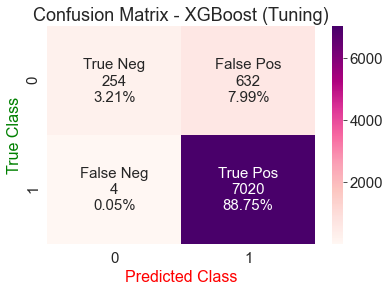

In [99]:
from sklearn.metrics import confusion_matrix, classification_report
figure = plt.figure(figsize=(6,4))
matplotlib.rcParams['font.size']=15

cm = confusion_matrix(y_test, xgBoost_result2)
print(cm)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='RdPu')

plt.xlabel('Predicted Class', fontsize=16, color='r') 
plt.ylabel('True Class', fontsize=16, color='g')
plt.title('Confusion Matrix - XGBoost (Tuning)', size=18);


In [100]:
print(metrics.classification_report(y_test, xgBoost_result2))


              precision    recall  f1-score   support

           0       0.98      0.29      0.44       886
           1       0.92      1.00      0.96      7024

    accuracy                           0.92      7910
   macro avg       0.95      0.64      0.70      7910
weighted avg       0.92      0.92      0.90      7910



In [101]:
# AUC-score for Best XGBoost
roc_auc_score(y_test, xgBoost_result2)


0.6430561197468081

## Feature Importance with XGBoost
Next, perform "Features Importance" to identify which features contributes or decreasing the weighted impurity for XGBoost model.

In [102]:
len(xgb_model.feature_importances_)    # Checking

14

In [103]:
xgb_model.feature_importances_

array([0.0351762 , 0.0386489 , 0.03550713, 0.03486221, 0.05977975,
       0.04112942, 0.1158114 , 0.1981406 , 0.03024672, 0.03747696,
       0.05126124, 0.03006455, 0.17985404, 0.11204086], dtype=float32)

In [104]:
columns = features.columns 
columns

Index([' n_tokens_content', ' n_unique_tokens', ' num_hrefs', ' num_imgs',
       ' num_videos', ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_tech', ' is_weekend', ' global_subjectivity',
       ' title_subjectivity', ' shares', ' avg_positive_polarity',
       ' title_sentiment_polarity'],
      dtype='object')

[0.0351762  0.0386489  0.03550713 0.03486221 0.05977975 0.04112942
 0.1158114  0.1981406  0.03024672 0.03747696 0.05126124 0.03006455
 0.17985404 0.11204086]


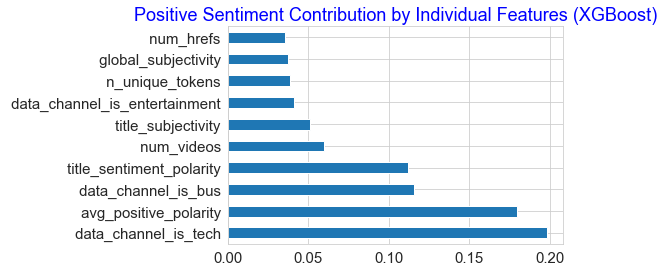

In [105]:
xgb_feat_importances = pd.Series(xgb_model.feature_importances_, index=columns) 
print(xgb_model.feature_importances_)
xgb_feat_importances.nlargest(10).plot(kind='barh')
plt.title('Positive Sentiment Contribution by Individual Features (XGBoost)', 
          size=18, color='blue');

### Perform XGBoost Prediction with Importance Features (High score)
From the Feature Importance result, select only the 4 features with high score for prediction. Assigning the Features3 and Target3 accordingly.

In [106]:
features3 = dataset3[[' avg_positive_polarity',' data_channel_is_tech',
                      ' data_channel_is_bus', ' title_sentiment_polarity']]   
features3.head()

,avg_positive_polarity,data_channel_is_tech,data_channel_is_bus,title_sentiment_polarity
0,0.378636,0,0,0
1,0.286915,0,1,0
2,0.495833,0,1,0
3,0.385965,0,0,0
4,0.411127,1,0,1


In [107]:
target3 = dataset3[' global_sentiment_polarity']   # assigning target
target3.head()

0    1
1    1
2    1
3    1
4    1
Name:  global_sentiment_polarity, dtype: int64

### Perform Train-Test-Split and Fitting the Model
Perform train-test-split on the Features3 and Target3, and create "Important XGBoost".

In [108]:
from sklearn.model_selection import train_test_split      # train-test-split

X_train3, X_test3, y_train3, y_test3 = train_test_split(features3, target3, 
                                                    test_size = 0.2, random_state = 111)

In [109]:
import xgboost as xgb
from sklearn import metrics

xgb = xgb.XGBClassifier(random_state = 1)
Im_xgb_model = xgb.fit(X_train3, y_train3)

### Proceed prediction with "Important XGBoost".

In [110]:
Im_xgb_result = Im_xgb_model.predict(X_test3)
Im_xgb_result = np.array(np.around(Im_xgb_result ), dtype = int)

### Model Evaluation - Importance XGBoost result: 
1) Confusion Matrix: Correctly predicted 6975 True Positive or 88.18% from the dataset. <br>
2) Classification Report: High score on Precision, Recall and Accuracy, model good in predicting positive class. Less accurate in predicting negative class as Recall is 0.34. <br>
3) AUC-score: Above Moderate, 66.64%. <br>

[[ 301  585]
 [  49 6975]]


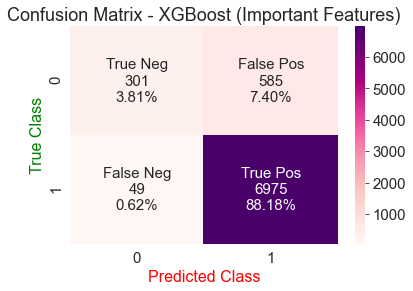

In [111]:
from sklearn.metrics import confusion_matrix, classification_report
figure = plt.figure(figsize=(6,4))
matplotlib.rcParams['font.size']=15

cm = confusion_matrix(y_test3, Im_xgb_result)
print(cm)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='RdPu')

plt.xlabel('Predicted Class', fontsize=16, color='r') 
plt.ylabel('True Class', fontsize=16, color='g')
plt.title('Confusion Matrix - XGBoost (Important Features)', size=18);


In [112]:
print(metrics.classification_report(y_test3, Im_xgb_result))

              precision    recall  f1-score   support

           0       0.86      0.34      0.49       886
           1       0.92      0.99      0.96      7024

    accuracy                           0.92      7910
   macro avg       0.89      0.67      0.72      7910
weighted avg       0.92      0.92      0.90      7910



In [113]:
# AUC-score for Important XGBoost
roc_auc_score(y_test3, Im_xgb_result)


0.6663765188171352

### Perform Features Selection on XGBoost
Apply another method of Forward Selection to check on best number of features to be selected for the prediction.

In [114]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
import xgboost as xgb   
xgb = xgb.XGBClassifier(random_state = 1) 

sfs = SFS(xgb, 
          k_features= 'best', 
          forward=True, 
          scoring='roc_auc',
          cv=3)             # took some time, cv=5 about 11 mins   # cv=3 about 5mins

In [115]:
sfs = sfs.fit(X_train, y_train)

### Feature Selection Result
Based on the result, in order to have the best of roc_auc score, features to be selected is 10 out of 14. And the different between 0.854556 and 0.852857 is 0.001699 or 0.1699%, hence not much different in using Selected or all features for prediction. Possible reason could be due to limitation on the dataset.

In [116]:
print('Features selected:', sfs.k_feature_idx_)
print('CV Score:', sfs.k_score_)                 
print('Feature names', sfs.k_feature_names_)

Features selected: (1, 3, 4, 6, 7, 9, 10, 11, 12, 13)
CV Score: 0.8545557463175971
Feature names (' n_unique_tokens', ' num_imgs', ' num_videos', ' data_channel_is_bus', ' data_channel_is_tech', ' global_subjectivity', ' title_subjectivity', ' shares', ' avg_positive_polarity', ' title_sentiment_polarity')


In [117]:
pd.DataFrame.from_dict(sfs.get_metric_dict()).T


,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(12,)","[0.7809085156175375, 0.7807643030266097, 0.779...",0.780466,"( avg_positive_polarity,)",0.00118716,0.000527551,0.000373035
2,"(4, 12)","[0.8044208817975413, 0.8023017164431598, 0.796...",0.801035,"( num_videos, avg_positive_polarity)",0.00765579,0.00340208,0.00240563
3,"(4, 7, 12)","[0.8212478048744647, 0.8230141404047397, 0.809...",0.817867,"( num_videos, data_channel_is_tech, avg_posi...",0.0136654,0.00607263,0.004294
4,"(4, 7, 12, 13)","[0.8262759281982702, 0.8332595250182155, 0.818...",0.826083,"( num_videos, data_channel_is_tech, avg_posi...",0.0133682,0.00594055,0.0042006
5,"(4, 7, 10, 12, 13)","[0.8346941427805167, 0.8441321883944833, 0.829...",0.836064,"( num_videos, data_channel_is_tech, title_su...",0.0137394,0.00610551,0.00431725
6,"(4, 7, 9, 10, 12, 13)","[0.8438122717620522, 0.8505568667331584, 0.833...",0.842743,"( num_videos, data_channel_is_tech, global_s...",0.0154335,0.00685833,0.00484957
7,"(1, 4, 7, 9, 10, 12, 13)","[0.8473218090773492, 0.8548081061935288, 0.839...",0.847363,"( n_unique_tokens, num_videos, data_channel_...",0.0136421,0.00606227,0.00428667
8,"(1, 4, 6, 7, 9, 10, 12, 13)","[0.8556061577404351, 0.8586455870854015, 0.839...",0.851225,"( n_unique_tokens, num_videos, data_channel_...",0.018986,0.008437,0.00596586
9,"(1, 3, 4, 6, 7, 9, 10, 12, 13)","[0.8546249182568316, 0.8609167783212753, 0.842...",0.852709,"( n_unique_tokens, num_imgs, num_videos, da...",0.0171151,0.00760561,0.00537798
10,"(1, 3, 4, 6, 7, 9, 10, 11, 12, 13)","[0.8525671028751551, 0.8621814465749587, 0.848...",0.854556,"( n_unique_tokens, num_imgs, num_videos, da...",0.0125886,0.00559412,0.00395564


### Visualize the Feature Selection results

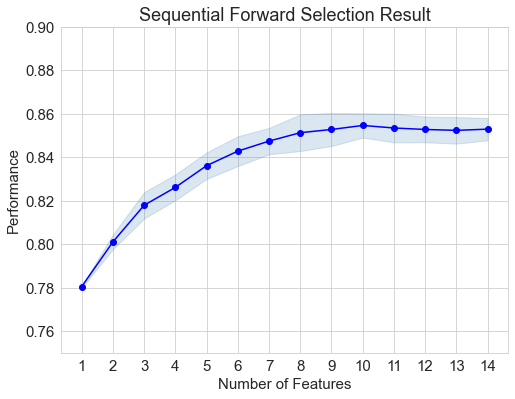

In [118]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

fig1 = plot_sfs(sfs.get_metric_dict(), kind='std_dev', figsize=(8,6))
plt.ylim([0.75, 0.90])    
plt.title('Sequential Forward Selection Result')
plt.grid(True)
plt.show()

## Model Selction Bar Chart

(66.0, 68.0, 70.0)


<ipython-input-119-1a45064d15fc>:9: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  bars = plt.bar(models, auc_values, width = 0.5, color="bbr", edgecolor='black', linewidth=2)


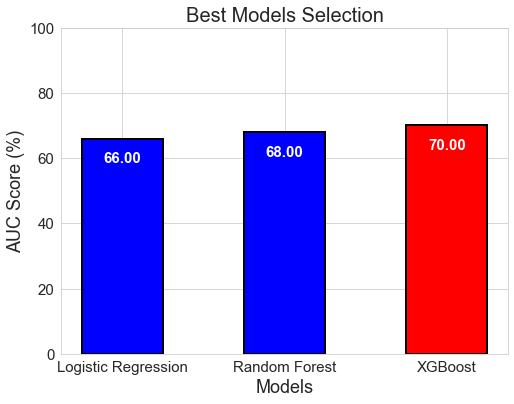

In [119]:
# models
models = ('Logistic Regression', 'Random Forest', 'XGBoost')

# list to store accuracy values of all models
auc_values = (LR_AUC_Score, RF_AUC_Score, XGBoost_AUC_Score)
print(auc_values)

plt.figure(figsize = (8, 6))
bars = plt.bar(models, auc_values, width = 0.5, color="bbr", edgecolor='black', linewidth=2)
plt.title('Best Models Selection', fontsize = 20)
plt.xlabel('Models', fontsize = 18)
plt.ylabel('AUC Score (%)', fontsize = 18)
plt.ylim(0, 100)

for bar, auc in zip(bars, auc_values):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height-4, '%.2f' % float(auc), ha = 'center', 
             color = 'white', va = 'top', fontweight = 'bold', fontsize = 15)    
plt.show();